### Task 1: Introduction to Isolation Forest
**Description**: Install the necessary library and load a sample dataset.

**Steps**:
1. Install scikit-learn
2. Load a sample dataset using Python

In [1]:
# write your code from here
from sklearn.datasets import load_iris
import pandas as pd

# Load sample dataset (Iris)
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Display the first 5 rows
print(df.head())




   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


### Task 2: Building an Isolation Forest
**Description**: Initialize an Isolation Forest model and fit it to the Boston dataset.

**Steps**:
1. Initialize Isolation Forest
2. Fit model

In [2]:
# write your code from here
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.ensemble import IsolationForest

# Step 1: Load the Boston housing dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)
df_boston = boston.frame

# Prepare features (exclude the target 'MEDV')
X = df_boston.drop(columns=['MEDV'])

# Step 2: Initialize and fit the Isolation Forest model
iso_forest = IsolationForest(
    n_estimators=100,       # Number of trees in the forest
    contamination=0.1,      # Expected proportion of outliers
    random_state=42         # Seed for reproducibility
)
iso_forest.fit(X)

# Print confirmation and model parameters
print("Isolation Forest model has been fitted with parameters:")
print(iso_forest.get_params())


Isolation Forest model has been fitted with parameters:
{'bootstrap': False, 'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


### Task 3: Detecting Anomalies
**Description**: Use the fitted Isolation Forest model to predict anomalies.

**Steps**:
1. Predict anomalies
2. Display anomaly counts

In [3]:
# write your code from here
from sklearn.ensemble import IsolationForest
from sklearn.datasets import fetch_openml

# Re-load the Boston housing dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)
df_boston = boston.frame

# Prepare features (exclude the target 'MEDV')
X = df_boston.drop(columns=['MEDV'])

# Reinitialize the Isolation Forest model
iso_forest = IsolationForest(
    n_estimators=100,       # Number of trees in the forest
    contamination=0.1,      # Expected proportion of outliers
    random_state=42         # Seed for reproducibility
)

# Fit the model to the data
iso_forest.fit(X)

# Step 1: Predict anomalies using the fitted Isolation Forest model
df_boston['anomaly'] = iso_forest.predict(X)

# Step 2: Display anomaly counts
# Anomalies are marked with -1, normal data is marked with 1
anomaly_counts = df_boston['anomaly'].value_counts()

anomaly_counts


anomaly
 1    455
-1     51
Name: count, dtype: int64

### Task 4: Visualizing Anomalies
**Description**: Visualize the results to see which samples are considered anomalies.

**Steps**:
1. Plot a scatter plot

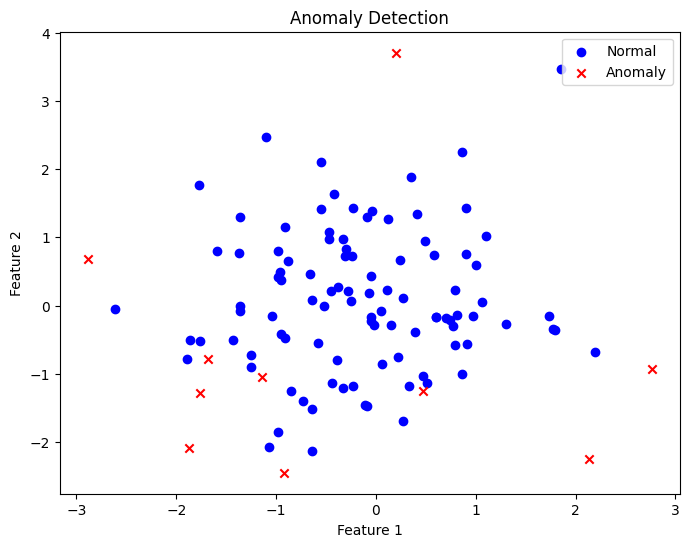

In [4]:
# write your code from here
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
X = np.random.randn(100, 2)  # 100 points in 2D space
outliers = np.random.randn(10, 2) * 2  # 10 anomaly points, scaled

# Combine the data
data = np.vstack([X, outliers])

# Create labels for anomalies (0 for normal, 1 for anomaly)
labels = np.zeros(len(X))
labels = np.concatenate([labels, np.ones(len(outliers))])

# Scatter plot
plt.figure(figsize=(8, 6))

# Normal points
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Normal', marker='o')

# Anomalous points
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', label='Anomaly', marker='x')

plt.title('Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


### Task 5: Interpret Contamination Parameter
**Description**: Experiment with different contamination levels.

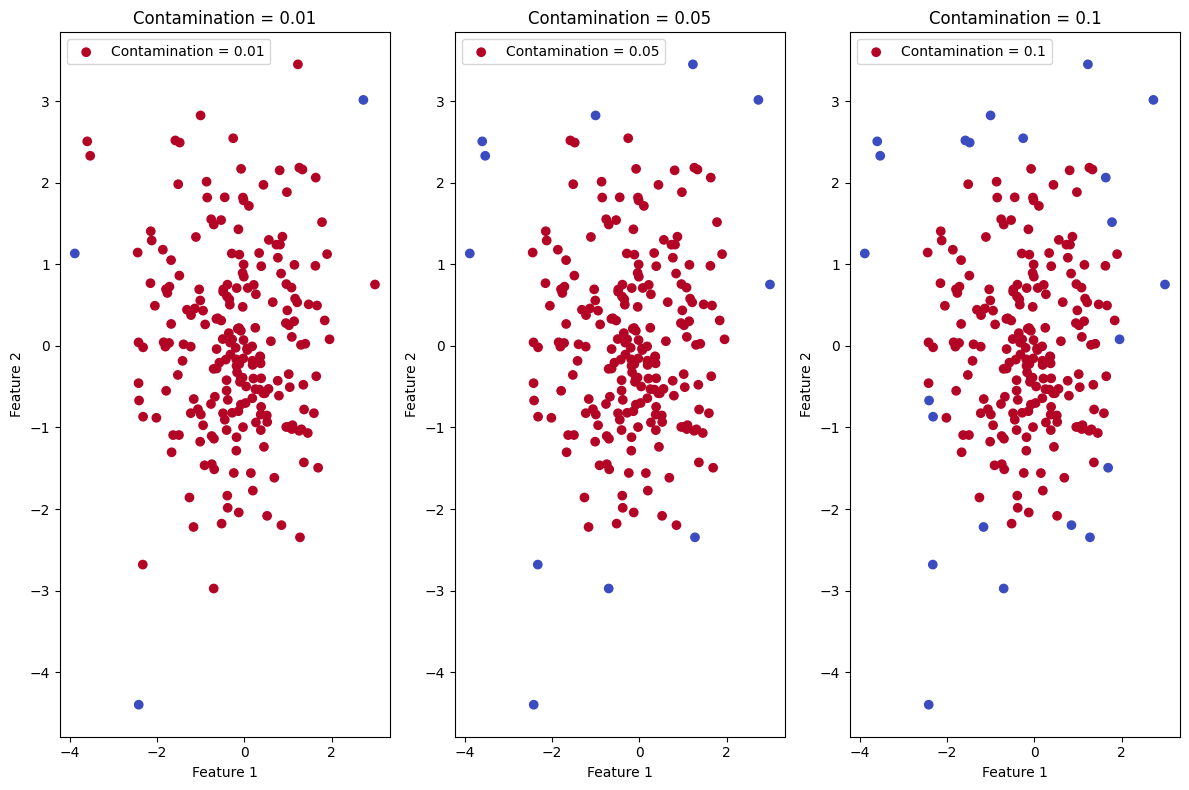

In [5]:
# write your code from here
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np

# Example synthetic data
X = np.random.randn(200, 2)  # 200 normal data points in 2D
outliers = np.random.randn(20, 2) * 3  # 20 anomaly points, scaled

# Combine the data
data = np.vstack([X, outliers])

# Experiment with different contamination levels
contamination_levels = [0.01, 0.05, 0.1]
plt.figure(figsize=(12, 8))

for i, contamination in enumerate(contamination_levels):
    # Initialize Isolation Forest with the current contamination level
    clf = IsolationForest(contamination=contamination, random_state=42)
    clf.fit(data)

    # Predict anomaly scores (-1 for outliers, 1 for inliers)
    y_pred = clf.predict(data)

    # Plot the results
    plt.subplot(1, 3, i+1)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred, cmap='coolwarm', label=f'Contamination = {contamination}')
    plt.title(f'Contamination = {contamination}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

plt.tight_layout()
plt.show()
